## CUSTOMER CHURN PREDICTION

Customer churn is the phenomenon in which a client stops doing business with an entity.
There can be various reasons for users to stop using a company's product or services.
Variety of reasons, such as affordability, dissatisfaction with the offering, or customer service can be some of the reasons.

In the dataset:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("CustomerChurn.csv")

In [3]:
df_data=df.copy()

In [4]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_data.shape

(7043, 21)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

##### customerID-Customer ID
##### Gender-Whether the customer is a male or a female
##### SeniorCitizen-Whether the customer is a senior citizen or not (1, 0)
##### Partner-Whether the customer has a partner or not (Yes, No)
##### Dependents-Whether the customer has dependents or not (Yes, No)
##### tenure-Number of months the customer has stayed with the company
##### PhoneService-Whether the customer has a phone service or not (Yes, No)
##### MultipleLines-Whether the customer has multiple lines or not (Yes, No, No phone service)
##### InternetService-Customer’s internet service provider (DSL, Fiber optic, No)
##### OnlineSecurity-Whether the customer has online security or not (Yes, No, No internet service)
##### OnlineBackup-Whether the customer has online backup or not (Yes, No, No internet service)
##### DeviceProtection-Whether the customer has device protection or not (Yes, No, No internet service)
##### TechSupport-Whether the customer has tech support or not (Yes, No, No internet service)
##### StreamingTV-Whether the customer has streaming TV or not (Yes, No, No internet service)
##### StreamingMovies-Whether the customer has streaming movies or not (Yes, No, No internet service)
##### Contract-The contract term of the customer (Month-to-month, One year, Two year)
##### PaperlessBilling-Whether the customer has paperless billing or not (Yes, No)
##### PaymentMethod-The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
##### MonthlyCharges-The amount charged to the customer monthly
##### TotalCharges-The total amount charged to the customer
##### Churn-Whether the customer churned or not (Yes or No)

In [9]:
df_data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
df_data["Churn"].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Text(0.5, 1.0, 'Count of target variable per category')

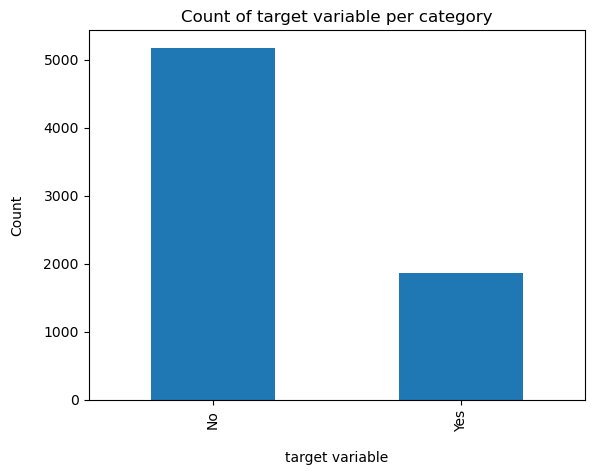

In [11]:
df_data["Churn"].value_counts().plot(kind="bar")
plt.xlabel("target variable",labelpad=14)
plt.ylabel("Count",labelpad=14)
plt.title("Count of target variable per category")

Dataset is a highly imbalanced Dataset

#### Finding Categorical Values

In [12]:
df_data.dtypes=="object"

customerID           True
gender               True
SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
TotalCharges         True
Churn                True
dtype: bool

### DATA CLEANING

In [13]:
df_data["tenure"].max()
#finding the max value in tenure

72

In [14]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_data['tenure_group'] = pd.cut(df_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [15]:
df_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [16]:
df_data.drop(columns=['tenure_group'],axis=1, inplace=True)

In [17]:
df_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
#drop column customerID and tenure
df_data.drop(columns= ['customerID'], axis=1, inplace=True)
#tenure bins are already created. Hence Tenure is not required now.
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA

#### Univariate Analysis

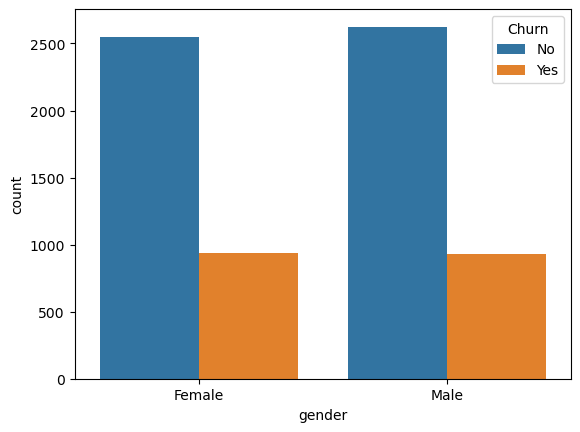

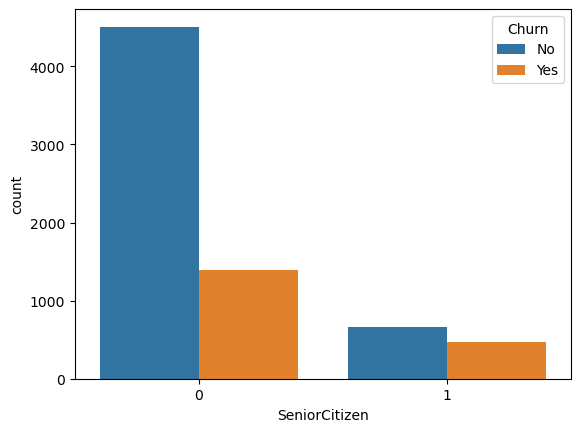

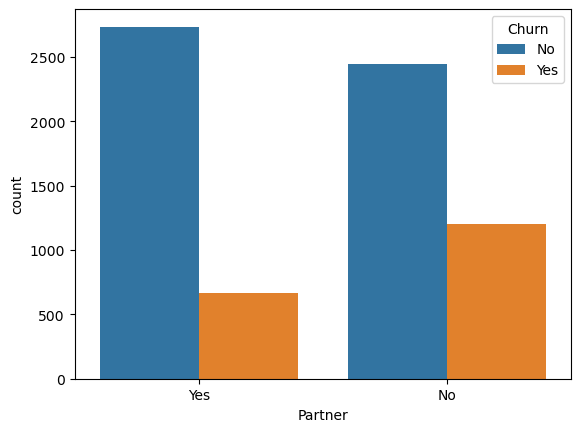

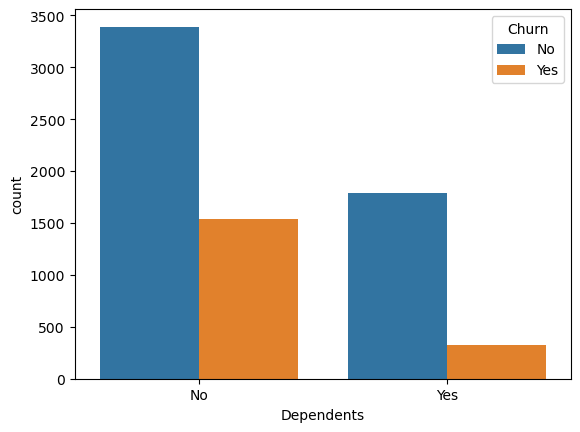

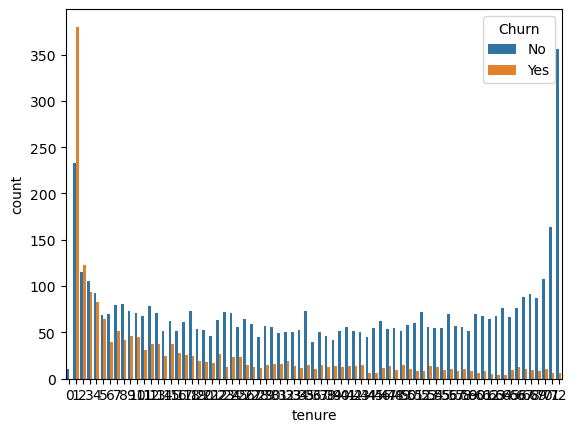

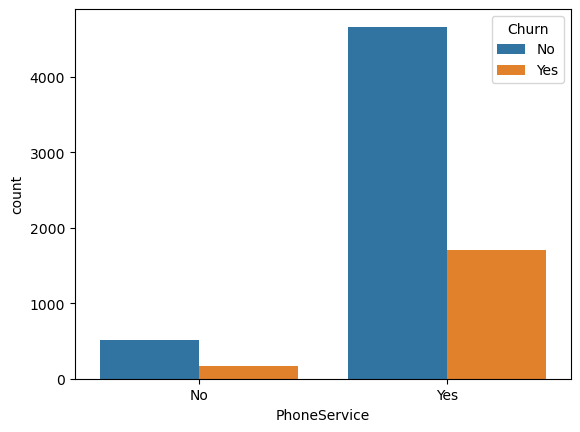

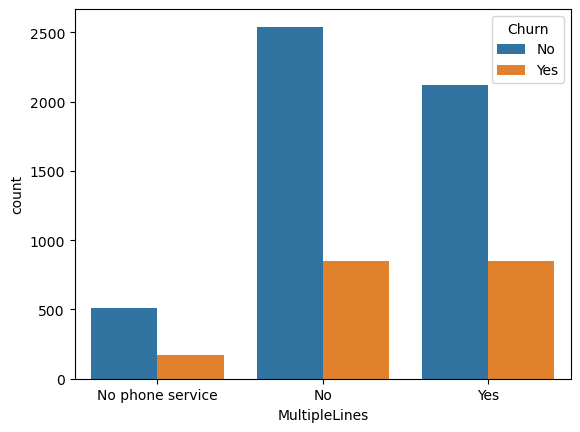

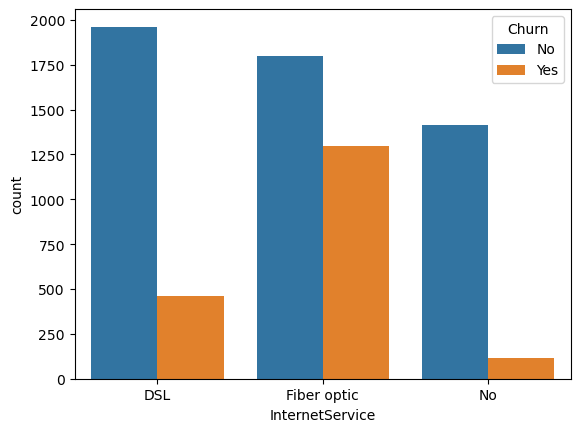

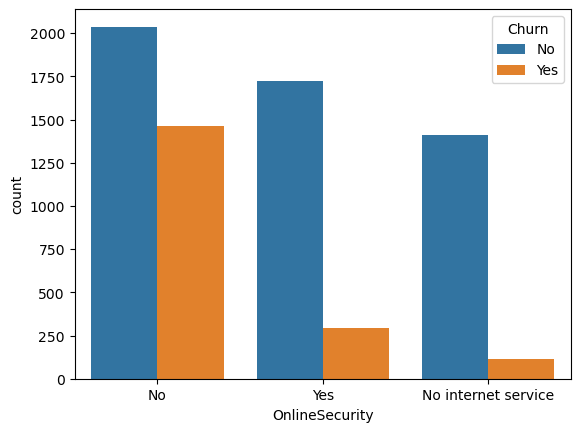

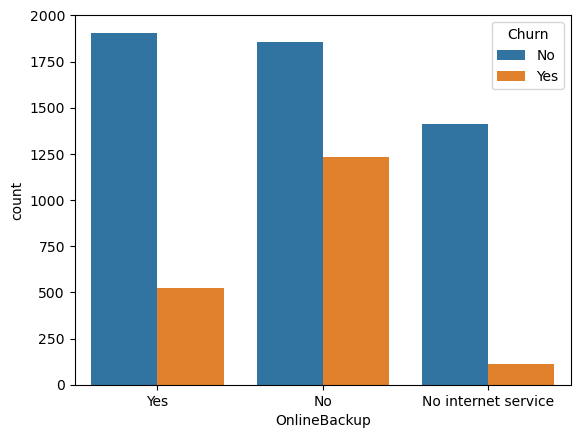

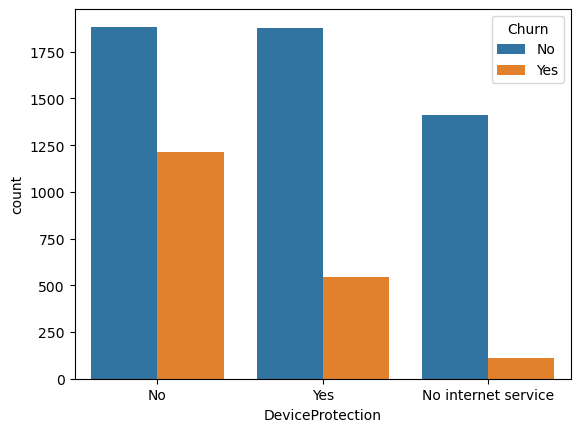

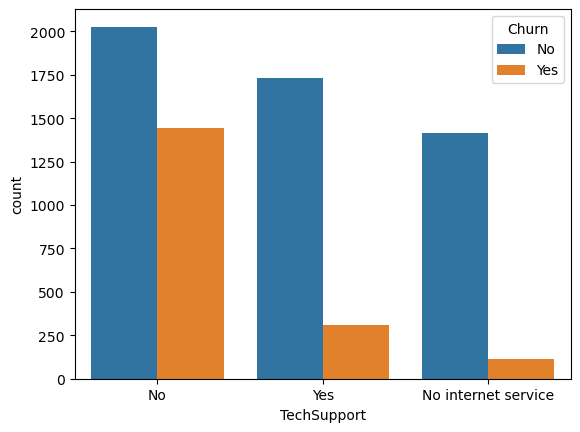

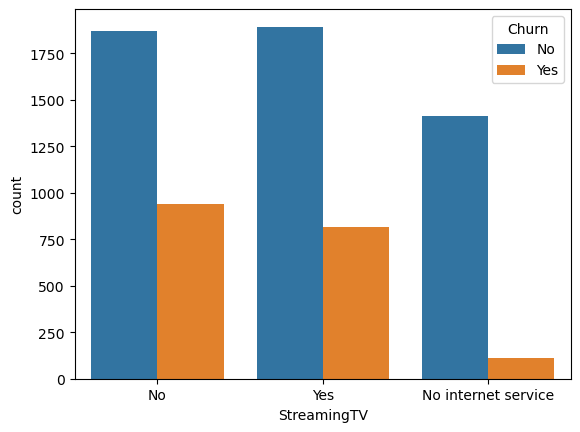

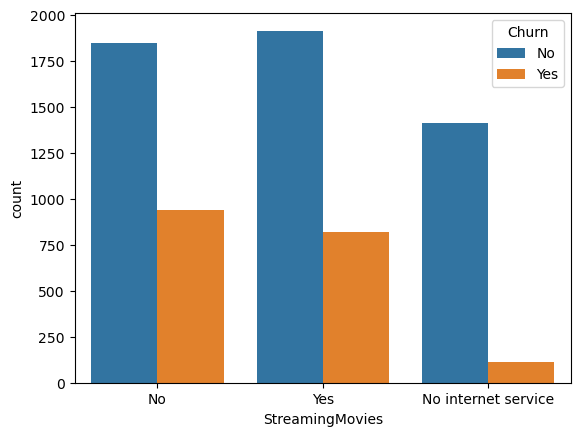

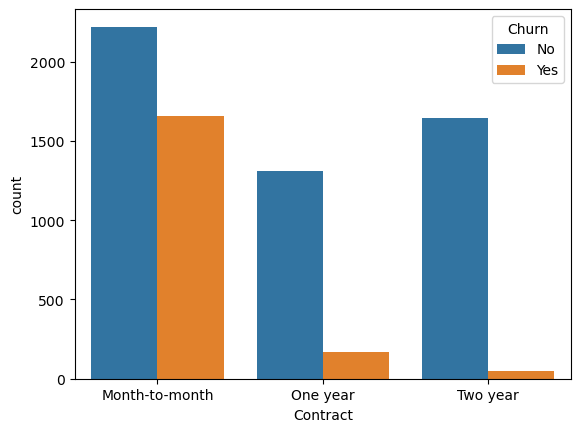

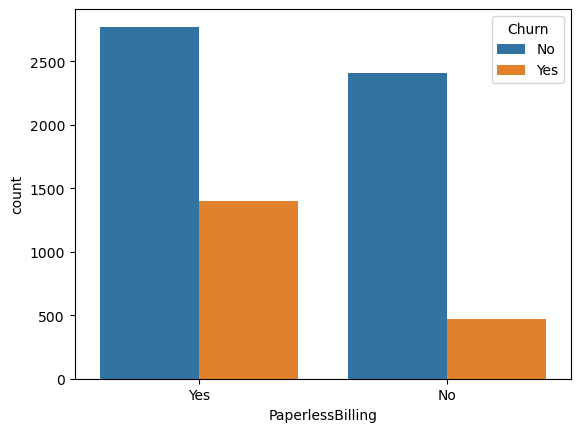

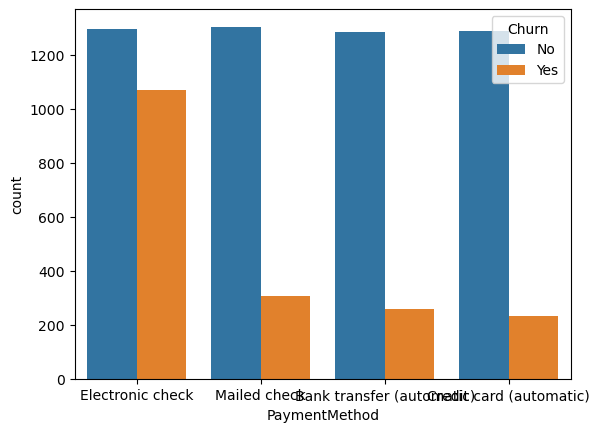

In [19]:
for i, predictor in enumerate(df_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_data, x=predictor, hue='Churn')

### Insights:


     1. There is not much difference in percentage between Female and Male employees who churn.
     2. Senior citizens are More likely to change.
     3. Customers who have no partners are most likely to churn.
     4. Customers who have no dependance are more likely to churn.
     5. Customers who have no Phone service are more likely to churn.
     6. Customers who have multiple lines are more likely to churn.
     7. Customers who have Fibre optic Internet service are more likely to churn.
     8. Customers who have Internet Security are less likely to churn.
     9. Customers with No online backup are more likely to churn.
     10.Customers with No device protection are more likely to churn.
     11.Customers with No Tech support are more likely to churn.
     12.Customers with month to month contract are more likely to churn than with one year contract.
     13.Customers with Electronic check payement method are more likely to churn compared to other modes.
    

#### Finding Numerical values

In [20]:
df_data.dtypes!="object"

gender              False
SeniorCitizen        True
Partner             False
Dependents          False
tenure               True
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges       True
TotalCharges        False
Churn               False
dtype: bool

In [21]:
df_data.TotalCharges.values
#TotalCharges are in string.

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [22]:
#converting TotalCharges string values into numeric values.
pd.to_numeric(df_data.TotalCharges,errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
pd.to_numeric(df_data.TotalCharges,errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [25]:
df_data[pd.to_numeric(df_data.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


11 rows are having null values in TotalCharges.

In [26]:
df_data.iloc[488]["TotalCharges"]

' '

In [27]:
#Lets drp all of this rows
df1=df_data[df_data.TotalCharges!=" "]
df1.shape

(7032, 20)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [29]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [31]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
#string data types is converted to numeric datatype

C:\Users\Rekhasree KS\AppData\Local\Temp\ipykernel_31056\2598316868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [32]:
df1.TotalCharges.dtypes

dtype('float64')

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Visualizing the Numerical Variables

## MonthlyCharges 

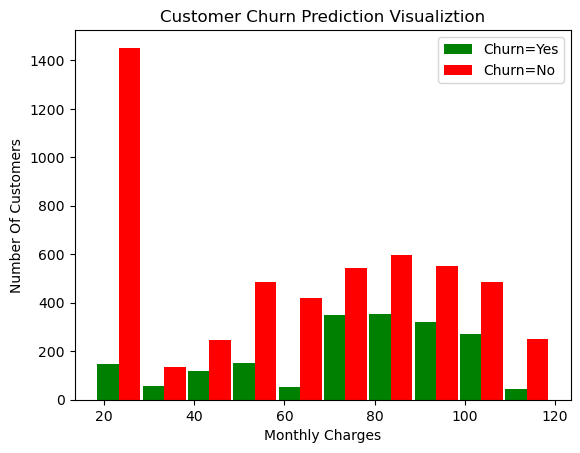

In [34]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

## TotalCharges

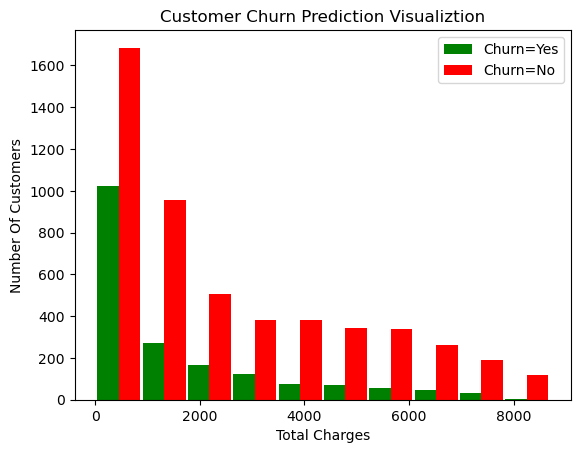

In [35]:
mc_churn_no = df1[df1.Churn=='No'].TotalCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].TotalCharges      

plt.xlabel("Total Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [37]:
df1.replace( 'No internet service','No', regex=True )

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [38]:
#value_to_replace = "No internet service"
#new_value = "No"

df1.replace("No internet service","No", inplace=True)
df1.replace("No phone service","No", inplace=True)

C:\Users\Rekhasree KS\AppData\Local\Temp\ipykernel_31056\2584780307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No", inplace=True)
C:\Users\Rekhasree KS\AppData\Local\Temp\ipykernel_31056\2584780307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No", inplace=True)


In [39]:
def print_unique_col_values(df1):
       for column in df1:
            if df1[column].dtypes=='object':
                print(f'{column}: {df1[column].unique()}') 

In [40]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [41]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Rekhasree KS\AppData\Local\Temp\ipykernel_31056\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [42]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [43]:
df1['gender'].isnull().sum()

0

In [44]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [46]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## One hot encoding for categorical columns

The categorical variables in the dataset need to be converted into a numeric format before we can feed them into the machine learning model.

In [47]:
#df2 = pd.get_dummies(data=df1, columns=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','InternetService','Contract','PaperlessBilling','PaymentMethod','Churn'])
#df2.columns

In [48]:
#df2.sample(5)

In [49]:
#df2.dtypes

In [50]:
cat_features = df1.drop(['gender','tenure','MonthlyCharges','SeniorCitizen','TotalCharges'],axis=1)

cat_features.head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [51]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [52]:
num_features = df[['gender','tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

In [53]:
finaldf.dtypes

gender               object
tenure                int64
MonthlyCharges      float64
SeniorCitizen         int64
TotalCharges         object
Partner               int32
Dependents            int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
Churn                 int32
dtype: object

In [54]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   MonthlyCharges    7032 non-null   float64
 3   SeniorCitizen     7032 non-null   int64  
 4   TotalCharges      7032 non-null   object 
 5   Partner           7032 non-null   int32  
 6   Dependents        7032 non-null   int32  
 7   PhoneService      7032 non-null   int32  
 8   MultipleLines     7032 non-null   int32  
 9   InternetService   7032 non-null   int32  
 10  OnlineSecurity    7032 non-null   int32  
 11  OnlineBackup      7032 non-null   int32  
 12  DeviceProtection  7032 non-null   int32  
 13  TechSupport       7032 non-null   int32  
 14  StreamingTV       7032 non-null   int32  
 15  StreamingMovies   7032 non-null   int32  
 16  Contract          7032 non-null   int32  
 17  

In [55]:
finaldf['gender'].replace({'Female':1,'Male':0},inplace=True)

In [56]:
finaldf.dtypes

gender                int64
tenure                int64
MonthlyCharges      float64
SeniorCitizen         int64
TotalCharges         object
Partner               int32
Dependents            int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
Churn                 int32
dtype: object

In [57]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [59]:
y_train.value_counts()

Churn
0    3452
1    3452
Name: count, dtype: int64

## Building the Customer Churn Prediction Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

### Customer Churn Prediction Model Evaluation

In [61]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7690650581645843


In [62]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1711
           1       0.56      0.60      0.58       610

    accuracy                           0.77      2321
   macro avg       0.71      0.72      0.71      2321
weighted avg       0.78      0.77      0.77      2321



In [63]:
import tensorflow as tf

Text(95.72222222222221, 0.5, 'Truth')

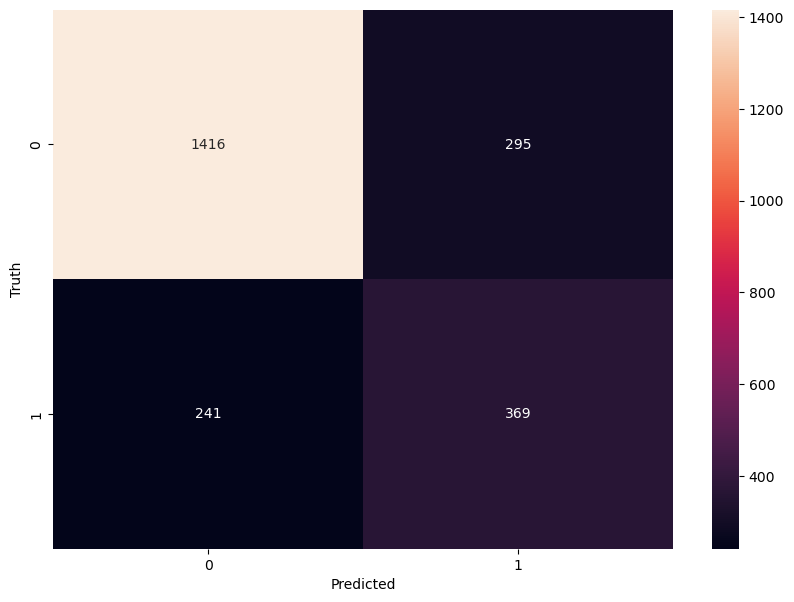

In [64]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=preds)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')